In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [29]:
import re
data = []

with open("sentences.txt",'r') as f:
    for line in f:
        data.append(re.split('[^a-z]', line.lower().replace('.','').strip()))

for i in range(len(data)):
    data[i] = [token for token in data[i] if token != '']
    
data

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [34]:
merged_sen = set(sum(data, []))
freq = np.zeros((len(data), len(merged_sen)))
freq.shape

(22, 254)

In [46]:
for i in range(len(data)):
    freq[i] = [data[i].count(uniq) for uniq in merged_sen]
freq

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [68]:
from scipy import spatial

coss = []
for i in range(1,len(freq)):
    coss.append(spatial.distance.cosine(freq[0], freq[i]))

In [75]:
sorted(enumerate(coss), key=lambda x: x[1])

[(5, 0.7327387580875756),
 (3, 0.77708871496985887),
 (20, 0.82503644694405864),
 (9, 0.83281653622739416),
 (11, 0.83964325485254543),
 (15, 0.84063618542208085),
 (19, 0.84275727449171223),
 (1, 0.86447381456421235),
 (12, 0.87035925528956715),
 (13, 0.87401184233025764),
 (10, 0.88047713906656067),
 (7, 0.88427248752843102),
 (18, 0.88854435748492944),
 (2, 0.89517151632780823),
 (8, 0.90550888174769317),
 (6, 0.92587506833388988),
 (4, 0.94023856953328033),
 (14, 0.94427217874246472),
 (17, 0.94427217874246472),
 (0, 0.95275444087384664),
 (16, 0.95664450152379399)]

In [150]:
def f(x):
    if hasattr(x, '__getitem__'):
        return [np.sin(t / 5.) * np.exp(t / 10.) + (5. * np.exp(-t / 2.)) for t in x]
    else:
        return np.sin(x / 5.) * np.exp(x / 10.) + (5. * np.exp(-x / 2.))

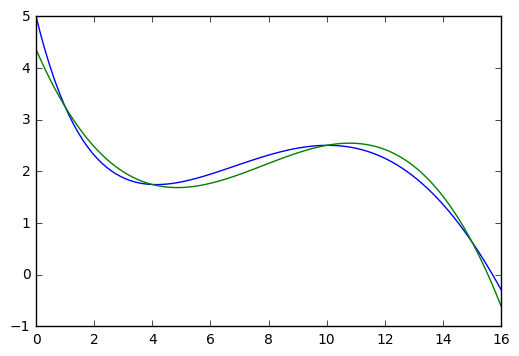

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [156]:
def Polynom(x):
    A = np.zeros((len(x), len(x)))
    b = f(x)
    for i in range(len(x)):
        tmp = 1
        for j in range(len(x)):
            A[i][j] = tmp
            tmp *= x[i]
    return scipy.linalg.solve(A, b)

def Calc(x, coeff):
    tmp = 1
    pows = []
    for i in range(len(coeff)):
        pows.append(tmp)
        tmp *= x
    return np.dot(pows, coeff)

coeffs = Polynom([1,4,10,15])
Calc(10, coeffs)
xx = np.linspace(0,16,100)
plt.plot(xx, f(xx))
plt.plot(xx, [Calc(i, coeffs) for i in xx])
plt.show()
print coeffs